In [117]:
import numpy as np
import cv2
import pandas as pd
from skimage.filters import roberts, sobel, scharr, prewitt

In [118]:
main_path = '../data/Task04_Hippocampus_processed/train/'
img_path = 'imagesTr/'
label_path = 'labelsTr/'

img_files = sorted(os.listdir(main_path+img_path))
label_files = sorted(os.listdir(main_path+label_path))

In [119]:
def get_features(img, label):
    df = pd.DataFrame()
    df['Original Image'] = img.reshape(-1)

    #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []
    for theta in range(2):   #Define number of thetas
        theta = theta / 4. * np.pi
        for sigma in (1, 3):  #Sigma with 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                
                    
                    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    # print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                    num += 1  #Increment for gabor column label
                    
    ########################################
    #Gerate OTHER FEATURES and add them to the data frame
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             
    # #CANNY EDGE
    # edges = cv2.Canny(img, 100,200)   #Image, min and max values
    # edges1 = edges.reshape(-1)
    # df['Canny Edge'] = edges1 #Add column to original dataframe


    #ROBERTS EDGE
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

    #SOBEL
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

    #SCHARR
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #PREWITT
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #GAUSSIAN with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #GAUSSIAN with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    # MEDIAN with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    # VARIANCE with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    ######################################                

    #Now, add a column in the data frame for the Labels
    #For this, we need to import the labeled image

    #Remember that you can load an image with partial labels 
    #But, drop the rows with unlabeled data

    # labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    labeled_img = label.reshape(-1)
    df['Labels'] = labeled_img
    return df

In [120]:
for name in img_files:
    count = 0
    img = np.load(main_path+img_path+name)
    label = np.load(main_path+label_path+name)
    # print(img.shape, label.shape)
    for i in range(img.shape[2]):
        # print(len(np.unique(label[:,:,i])))
        if count == 0:
            if len(np.unique(label[:,:,i]))>=2:
                final_img = img[:,:,i]
                final_label = label[:,:,i]
                df = get_features(final_img, final_label)
                # final_img = final_img.reshape(-1)
                # final_label = final_label.reshape(-1)
                count+=1
        else:
            if len(np.unique(label[:,:,i]))>=2:
                new_img = img[:,:,i]
                new_label = label[:,:,i]
                new_df = get_features(new_img, new_label)
                df = pd.concat([df, new_df])
                # final_img = np.concatenate((final_img, new_img), 0)
                # final_label = np.concatenate((final_label, new_label), 0)
                count+=1
# print(final_img.shape, final_label.shape)


In [121]:
print(df.shape)

(39600, 42)


In [122]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0       43.768495       0       0     225     125      54      34       7   
1       43.408373       0       0     255     139      90      45      42   
2       43.268435       0       0     255     158     108      56      48   
3       41.492201       0       0     255     152     105      66      59   
4       31.160848       0       0     140      84      24      19       0   

   Gabor8  Gabor9  ...  Gabor32    Roberts      Sobel     Scharr    Prewitt  \
0       9       0  ...        0   6.252519   3.283315   3.018536   3.651088   
1      19       0  ...       17  10.979406   6.030552   5.968391   6.160455   
2      23       0  ...       31  12.760871   8.272214   8.539626   7.919158   
3      39       0  ...        7  16.171809  12.443756  12.327646  12.618259   
4       1       0  ...        9  13.305394  17.447845  16.982990  18.067684   

   Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  


In [123]:
# img = final_img
# labeled_img = final_label

In [124]:
# img = cv2.imread('images/sandstone/Train_images/Sandstone_Versa0000.tif')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
# #Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
# #For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

# #Multiple images can be used for training. For that, you need to concatenate the data

# #Save original image pixels into a data frame. This is our Feature #1.
# img2 = img.reshape(-1)

In [125]:
# labeled_img = cv2.imread('images/sandstone/Train_mask_APEER/Train_masks_APEER.ome00.tif')

Gaussian s7       9.658056e-02
Gaussian s3       6.678657e-02
Median s3         6.567799e-02
Original Image    5.142845e-02
Gabor23           4.593978e-02
Gabor4            4.427199e-02
Gabor28           4.029501e-02
Gabor24           3.938638e-02
Prewitt           3.623922e-02
Scharr            3.612784e-02
Roberts           3.548777e-02
Variance s3       3.501583e-02
Gabor3            3.395275e-02
Sobel             3.314029e-02
Gabor32           3.313782e-02
Gabor12           3.277545e-02
Gabor31           2.954317e-02
Gabor11           2.941960e-02
Gabor5            2.919854e-02
Gabor6            2.881211e-02
Gabor29           2.660605e-02
Gabor21           2.510658e-02
Gabor8            2.492180e-02
Gabor7            2.477151e-02
Gabor30           2.170806e-02
Gabor27           1.691936e-02
Gabor22           1.284623e-02
Gabor20           3.901032e-03
Gabor13           2.014124e-06
Gabor14           2.474090e-07
Gabor15           0.000000e+00
Gabor10           0.000000e+00
Gabor9  

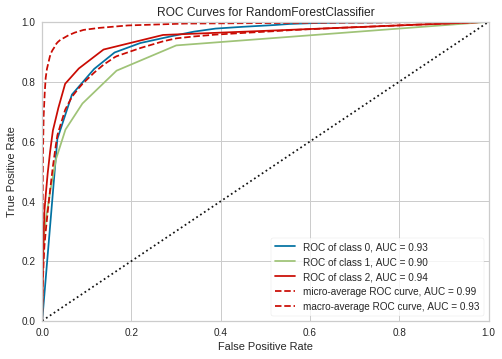

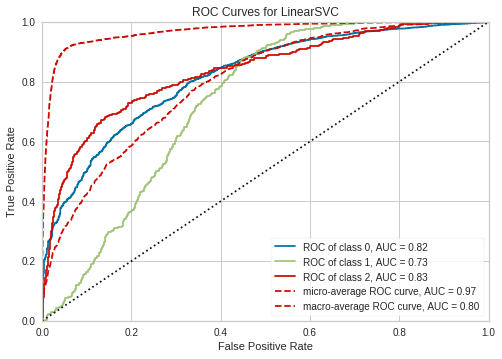

ValueError: cannot reshape array of size 39600 into shape (36,50,35)

In [126]:




original_img_data = df.drop(labels = ["Labels"], axis=1) #Use for prediction
#df.to_csv("Gabor.csv")
# df = df[df.Labels != 0]

#########################################################

#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Encode Y values to 0, 1, 2, 3, .... (NOt necessary but makes it easy to use other tools like ROC plots)
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)


#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)


# Import the model we are using
#RandomForestRegressor is for regression type of problems. 
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer. 

from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 20, random_state = 42)

# Train the model on training data
model.fit(X_train, y_train)

# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)



###
#SVM
# Train the Linear SVM to compare against Random Forest
#SVM will be slower than Random Forest. 
#Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.
from sklearn.svm import LinearSVC
model_SVM = LinearSVC(max_iter=100)  
model_SVM.fit(X_train, y_train)

#Logistic regression
#from sklearn.linear_model import LogisticRegression
#model_LR = LogisticRegression(max_iter=100).fit(X_train, y_train)
# prediction_test_LR = model_logistic.predict(X_test)

# verify number of trees used. If not defined above. 
#print('Number of Trees used : ', model.n_estimators)

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

#Test prediction on testing data. 
prediction_RF = model.predict(X_test)
prediction_SVM = model_SVM.predict(X_test)
#prediction_LR = model_LR.predict(X_test)

#.predict just takes the .predict_proba output and changes everything 
#to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
#In this example we have 4 labels, so the probabilities will for each label stored separately. 
# 
#prediction_prob_test = model.predict_proba(X_test)

#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy using Random Forest= ", metrics.accuracy_score(y_test, prediction_RF))
print ("Accuracy using SVM = ", metrics.accuracy_score(y_test, prediction_SVM))
#print ("Accuracy using LR = ", metrics.accuracy_score(y_test, prediction_LR))


#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

from yellowbrick.classifier import ROCAUC

print("Classes in the image are: ", np.unique(Y))

#ROC curve for RF
roc_auc=ROCAUC(model, classes=[0, 1, 2, 3])  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()
  
#ROC curve for SVM
roc_auc=ROCAUC(model_SVM, classes=[0, 1, 2, 3])  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

#ROC curve for LR
#roc_auc=ROCAUC(model_LR, classes=[0, 1, 2, 3])  #Create object
#roc_auc.fit(X_train, y_train)
#roc_auc.score(X_test, y_test)
#roc_auc.show()

############################################
#FOR RANDOM FOREST


#############################################

#MAKE PREDICTION
#You can store the model for future use. In fact, this is how you do machine elarning
#Train on training images, validate on test images and deploy the model on unknown images. 

import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model_SVM, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(original_img_data)

segmented = result.reshape((img.shape))


#plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')

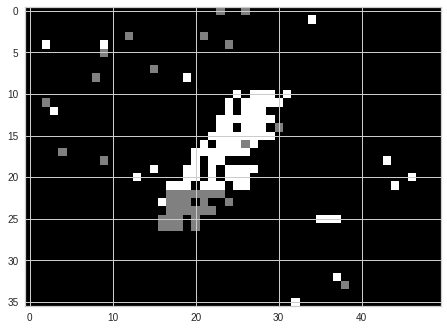

In [140]:
from matplotlib import pyplot as plt
plt.imshow(segmented[3600:5400].reshape(36,-1), cmap ='gray')
plt.show()

In [128]:
img = np.load(main_path+img_path+img_files[0])
label = np.load(main_path+label_path+label_files[0])

In [129]:
input_slice = img[:,:,20]
label_slice = label[:,:,20]
df_test = get_features(input_slice, label_slice)

In [130]:
label_list = df_test['Labels'].tolist()

In [131]:
X = df_test.drop(labels = ["Labels"], axis=1) 

In [132]:
prediction_SVM = model_SVM.predict(X)
prediction_RF = model.predict(X)

In [133]:
print(np.unique(prediction_RF))
print(np.unique(prediction_SVM))

[0 1 2]
[0]


In [134]:
print ("Accuracy using Random Forest= ", metrics.accuracy_score(label_list, prediction_RF))
print ("Accuracy using SVM = ", metrics.accuracy_score(label_list, prediction_SVM))

Accuracy using Random Forest=  0.8816666666666667
Accuracy using SVM =  0.9005555555555556


In [137]:
def plot_seg(img, gt, svm, rf):
    fig = plt.figure(figsize=(20,5))
    plt.subplot(1,4,1).imshow(img, cmap='gray')
    plt.subplot(1,4,1).set_title('Input Image', fontsize = 20)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,4,2).imshow(gt, cmap='gray')
    plt.subplot(1,4,2).set_title('Ground Truth', fontsize = 20)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,4,3).imshow(svm, cmap='gray')
    plt.subplot(1,4,3).set_title('SVM output', fontsize = 20)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,4,4).imshow(rf, cmap='gray')
    plt.subplot(1,4,4).set_title('Random Forest Output', fontsize = 20)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

/home/rahul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/rahul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/rahul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous 

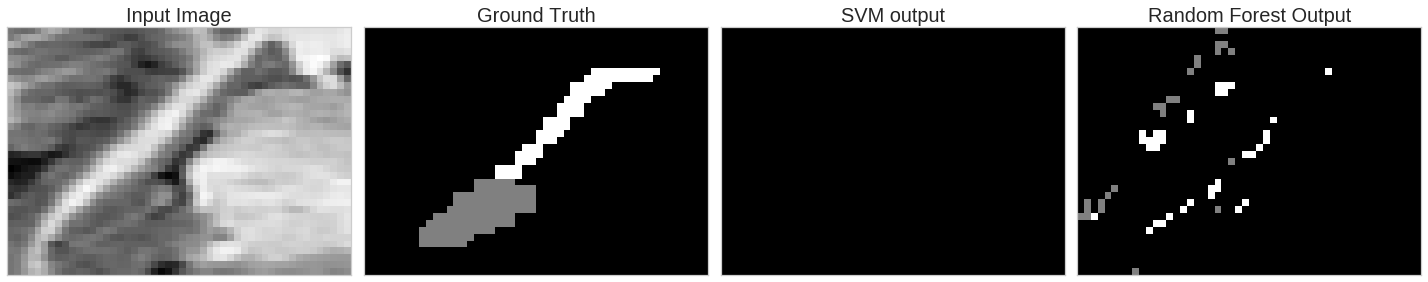

In [138]:
plot_seg(input_slice, label_slice, prediction_SVM.reshape(36,-1), prediction_RF.reshape(36,-1))